## 📘 Project Title: EDA Students

**Author:** Juan Martín Flores  

**Date:** 2025-06-04

**Description:** This notebook performs an exploratory data analysis (EDA) on the Students Performance dataset from Kaggle") in order to To understand the influence of the parents background, test preparation and other variables available on students performance.

**Tools:** Python (Pandas, Matplotlib, Seaborn), Google Colab / Jupyter  

---

### 📂 Dataset Info

- **Name:** students-performance.csv
- **Location:** ../data/students-performance.csv
- **Source:** [Kaggle / https://www.kaggle.com/datasets/spscientist/students-performance-in-exams]  

---

### 📈 Objective

- Have an understanding about a basic Exploratory Data Analysis process. 
- Perform EDA suggested steps on this data to obtain inshits on this data:
    - Understand the problem
    - Import & inspect data
    - Handling Missing values
    - Explore Data Characteristics
---

#### Understand the problem and the Data

We have data about score performance in students and we are try to understand the influence of the parents background, test preparation etc on students performance, as a way to practice EDA for this notebook. 

Source: Kaggle / https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

According to information provided by the webpage:
- Data is structure and in csv
- 100% of the data is valid, this means no mismatched or missing values. 
- Scores values follow a "normal" distribution. 
- 1 file, 8 columns

#### Import & Inspect Data

In [23]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import sys
import os

In [24]:
# import your custom module

# path to the module
file_path = "/Users/jmfe2/VSC/data-portfolio/scripts/cleaning.py"
path_to_module_folder = os.path.dirname(file_path)

if path_to_module_folder not in sys.path:
    sys.path.append(path_to_module_folder)
    print(f"Añadido '{path_to_module_folder}' a sys.path")

# Now you can import the module
import cleaning as ccn

In [25]:
# Load dataset
df = pd.read_csv(
    "/Users/jmfe2/VSC/data-portfolio/data/01_students/studentsperformance.csv"
)

In [26]:
df.shape  # (rowrs, columns)

(1000, 8)

In [27]:
df.columns  #

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [28]:
ccn.clean_column_names(df)  # In case we have Capital letters

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [30]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [31]:
# Basic checks
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Handinlg Missing Values

In [33]:
df.isnull().sum()  # check for missing values
# We have no missing values in this dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Exploratore Data Characteristics

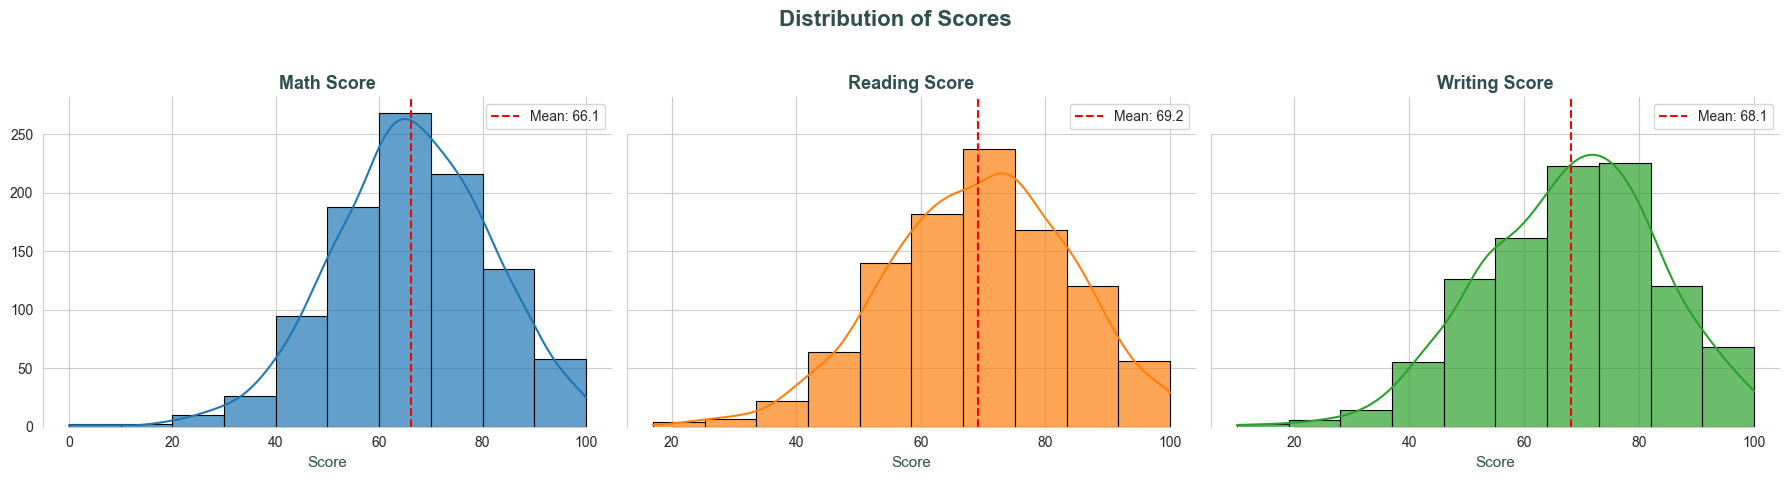

In [34]:
# Table that will be used for the histogram
score_columns = ["math score", "reading score", "writing score"]

# --- seaborn ---

sns.set_style("whitegrid")
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
]

# --- Histogram ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # 1 row, 3 column,

fig.suptitle(
    "Distribution of Scores", fontsize=16, fontweight="bold", color="darkslategray"
)

# Iterate over the score columns and their corresponding axes
for i, score_col in enumerate(score_columns):
    ax = axes[i]  # subplot for the current score column

    # Create histogram 'kde=True' add Kernel Density Estimate
    sns.histplot(
        data=df,
        x=score_col,
        ax=ax,
        color=colors[i],  # color in the list
        edgecolor="black",  # borde color of the bars
        linewidth=0.8,
        kde=True,  # Add Kernel Density Estimate for a smoother distribution curve
        bins=10,  # number of bins
        alpha=0.7,  # Transparency of the bars
    )

    # Add vertical line for the mean
    mean_val = df[score_col].mean()
    ax.axvline(
        mean_val,
        color="red",
        linestyle="--",
        linewidth=1.5,
        label=f"Mean: {mean_val:.1f}",
    )

    # --- Personalize the axes----
    ax.set_title(
        f"{score_col.replace('_', ' ').title()}",
        fontsize=13,
        fontweight="bold",
        color="darkslategray",
    )
    ax.set_xlabel("Score", fontsize=11, color="darkslategray")  # Label for the X-axis
    ax.set_ylabel("")  # remove Y-axis label for a cleaner look

    ax.tick_params(axis="x", labelsize=10)  # size of the font for X-axis ticks
    ax.tick_params(axis="y", labelsize=10)  # size of the font for Y-axis ticks

    ax.legend()  # Show

    # remove the top and right spines for a cleaner look
    sns.despine(ax=ax, trim=True)

# adjust the layout
plt.tight_layout(
    rect=[0, 0.03, 1, 0.95]
)  # adjust the layout to make room for the general title

# --- Save the plot ---
plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/01_students/scores_histogram_enhanced.png",
    dpi=300,  # Alta resolución para la imagen guardada
    bbox_inches="tight",  # Asegura que no haya espacios en blanco adicionales
)

plt.show()  # Show the plot

### Score Distribution by Subject

This section shows the distribution of student scores in **Math**, **Reading**, and **Writing**. Each histogram is overlaid with a density curve and includes a red dashed line indicating the **mean score**.

- **Math (Mean: 66.1)**: Slightly left-skewed. Most students scored between 60–80, but a few lower scores pull the average down.
- **Reading (Mean: 69.2)**: Fairly symmetric. The mean is centered, showing consistent reading performance.
- **Writing (Mean: 68.1)**: Slight negative skew. Most scores are slightly above average.

📌 **General insight**: Reading and writing scores are slightly higher than math. All three distributions are close to normal, suggesting no major outliers or extreme deviations.


(%) gender
female    51.8
male      48.2
Name: proportion, dtype: float64

Gender Counts:
 gender
female    518
male      482
Name: count, dtype: int64


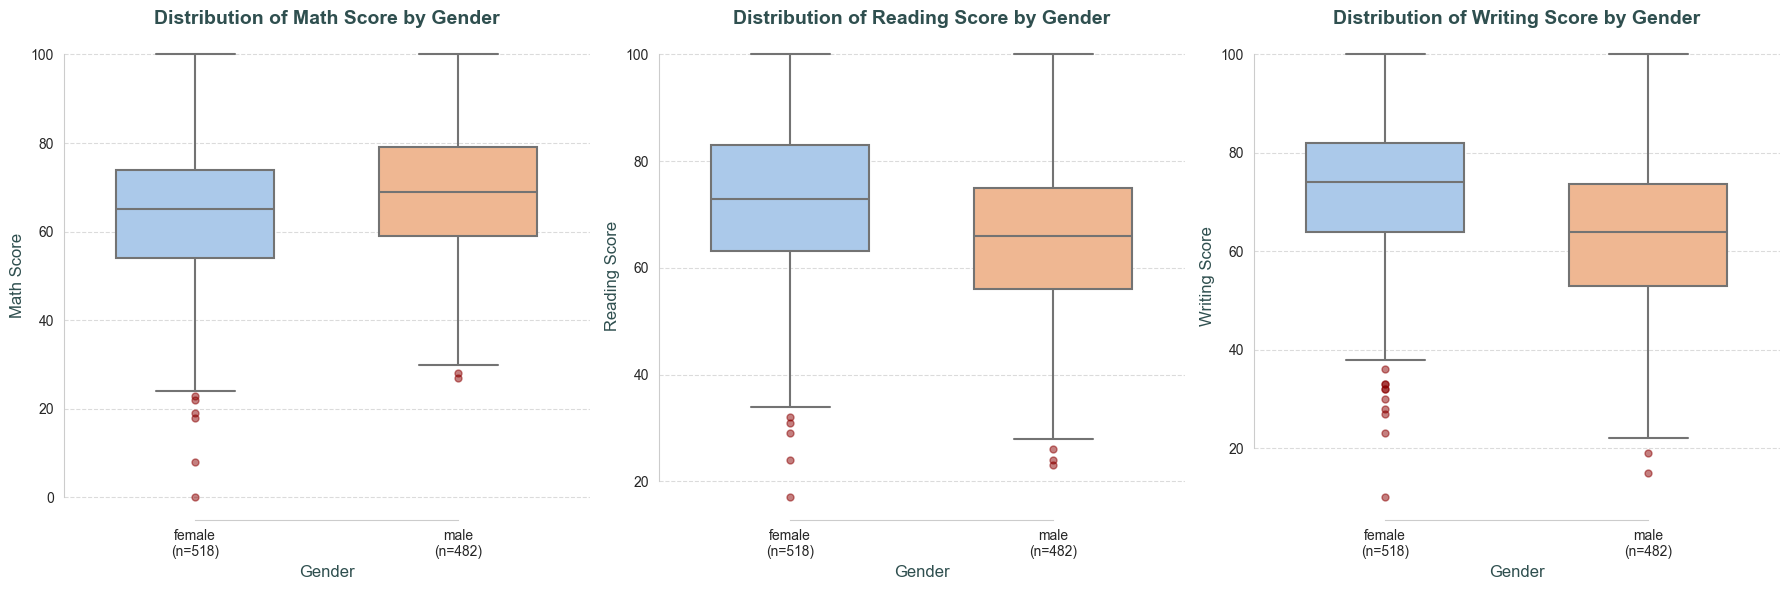

In [35]:
# --- Print Percentage Distribution of Gender Groups ---
# This shows the proportional representation of each gender in the dataset.
print(f"\n(%) {df['gender'].value_counts(normalize=True) * 100}")


# It computes how many individuals are in each gender group,
# and converts it to a dictionary for easy lookup when formatting labels.
gender_counts = df["gender"].value_counts()
gender_counts_dict = gender_counts.to_dict()
print("\nGender Counts:\n", gender_counts)

# --- Figure Setup ---
plt.figure(figsize=(18, 6))  # Set the overall figure size (width, height) in inches
sns.set_style("whitegrid")  # Apply a clean white background with a grid


for i, score_col in enumerate(score_columns):
    # Create a subplot: (rows, columns, current_plot_index)
    ax = plt.subplot(1, 3, i + 1)

    # --- Box Plot Creation ---
    sns.boxplot(
        data=df,  # Specify the DataFrame
        x="gender",  # Categorical variable for the x-axis
        y=score_col,  # Numerical variable for the y-axis (changes per loop iteration)
        hue="gender",  # Color the boxes based on gender categories
        palette="pastel",  # Choose a color palette for the boxes
        linewidth=1.5,  # Thickness of the box lines
        width=0.6,  # Width of the boxes
        fliersize=5,  # Adjusted fliersize for better visibility of outliers
        flierprops=dict(  # Properties for outlier points
            marker="o",  # Outlier marker shape (circle)
            markerfacecolor="darkred",  # Fill color of outlier markers
            markeredgecolor="darkred",  # Edge color of outlier markers
            alpha=0.5,  # Transparency of outlier markers (slightly more visible)
        ),
    )

    # --- Update X-axis Ticks to Include Counts ---
    # Get the current tick locations set by Seaborn
    current_x_tick_locations = ax.get_xticks()
    # Explicitly set the tick locations (this silences the warning)
    ax.set_xticks(current_x_tick_locations)

    current_x_labels = [label.get_text() for label in ax.get_xticklabels()]
    new_x_labels = []
    for label_text in current_x_labels:
        count = gender_counts_dict.get(label_text, 0)
        new_x_labels.append(f"{label_text}\n(n={count})")
    ax.set_xticklabels(new_x_labels, fontsize=10)

    # --- Plot Customization (Titles, Labels, Ticks) ---
    plt.title(
        f"Distribution of {score_col.replace('_', ' ').title()} by Gender",
        fontsize=14,
        fontweight="bold",
        color="darkslategray",
    )
    plt.xlabel("Gender", fontsize=12, color="darkslategray")
    plt.ylabel(score_col.replace("_", " ").title(), fontsize=12, color="darkslategray")
    plt.yticks(fontsize=10)  # X-axis tick font size (applies to current subplot)

    # --- Grid and Spines ---
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    sns.despine(trim=True)


# --- Final Layout and Saving ---
plt.tight_layout()
plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/01_students/multi_score_boxplots_gender.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()


### Score by Gender

**This boxplot compares math scores between male and female students**

**Male students:** Tend to score slightly higher in math. The upper whisker and median are visibly higher.

**Female students:** Show a tighter distribution but slightly lower median and mean scores.

📌 **General insight:** There is a small gender gap in math performance favoring males, though the difference is not dramatic.


(%) race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

Race/Ethnicity Counts:
 race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


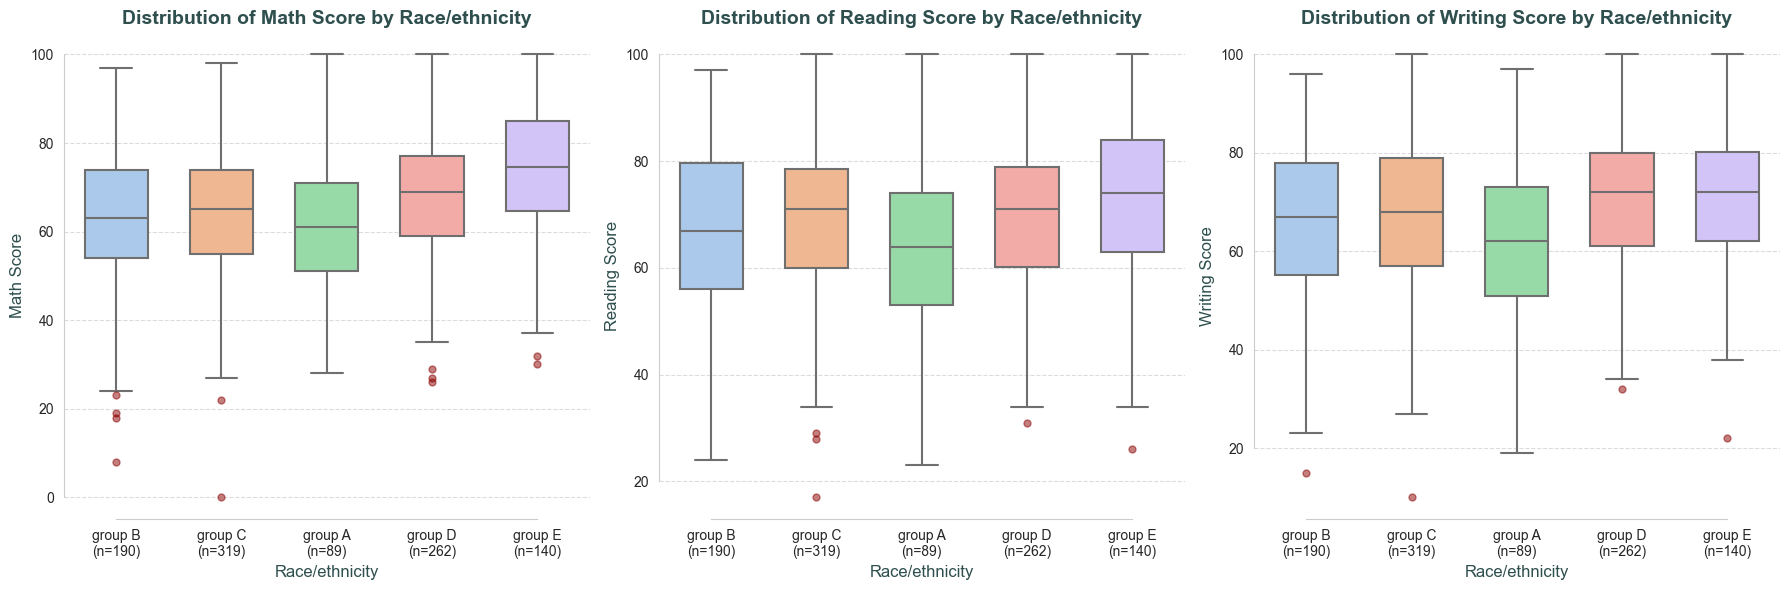

In [36]:
print(f"\n(%) {df['race/ethnicity'].value_counts(normalize=True) * 100}")


race_counts = df["race/ethnicity"].value_counts()
race_counts_dict = race_counts.to_dict()
print("\nRace/Ethnicity Counts:\n", race_counts)

# --- Figure Setup ---
plt.figure(figsize=(18, 6))
sns.set_style("whitegrid")


for i, score_col in enumerate(score_columns):
    ax = plt.subplot(1, 3, i + 1)

    # --- Box Plot Creation ---
    sns.boxplot(
        data=df,
        x="race/ethnicity",  # Categorical variable for the x-axis
        y=score_col,  # Numerical variable for the y-axis (changes per loop iteration)
        hue="race/ethnicity",  # Color the boxes based on gender categories
        palette="pastel",  # Choose a color palette for the boxes
        linewidth=1.5,  # Thickness of the box lines
        width=0.6,  # Width of the boxes
        fliersize=5,  # Adjusted fliersize for better visibility of outliers
        flierprops=dict(  # Properties for outlier points
            marker="o",  # Outlier marker shape (circle)
            markerfacecolor="darkred",  # Fill color of outlier markers
            markeredgecolor="darkred",
            alpha=0.5,
        ),
    )

    # --- Update X-axis Ticks to Include Counts ---

    current_x_tick_locations = ax.get_xticks()
    ax.set_xticks(current_x_tick_locations)

    current_x_labels = [label.get_text() for label in ax.get_xticklabels()]
    new_x_labels = []
    for label_text in current_x_labels:
        count = race_counts_dict.get(label_text, 0)
        new_x_labels.append(f"{label_text}\n(n={count})")
    ax.set_xticklabels(new_x_labels, fontsize=10)

    # --- Plot Customization (Titles, Labels, Ticks) ---
    plt.title(
        f"Distribution of {score_col.replace('_', ' ').title()} by Race/ethnicity",
        fontsize=14,
        fontweight="bold",
        color="darkslategray",
    )
    plt.xlabel("Race/ethnicity", fontsize=12, color="darkslategray")
    plt.ylabel(score_col.replace("_", " ").title(), fontsize=12, color="darkslategray")
    plt.yticks(fontsize=10)

    # --- Grid and Spines ---
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    sns.despine(trim=True)


# --- Final Layout and Saving ---
plt.tight_layout()
plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/01_students//multi_score_boxplots_race_ethnicity.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()


###  Score by Race / Ethnicity

**TThe box plots display Math, Reading, and Writing score distributions by Race/Ethnicity**.

Key Highlights:

-- Group E consistently shows the highest median scores across all three subjects.

-- Group A consistently has the lowest median scores in all three subjects.

-- Other groups (B, C, D) fall in between, with Group D often performing similarly to or slightly below Group E.

-- There are outliers (low scores) present in most groups for all subjects.

📌 **The graphs suggest a noticeable difference in academic performance related to racial/ethnic groups within this dataset, with some groups generally scoring higher than**


(%) parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64

Parental Distribution Counts:
 parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


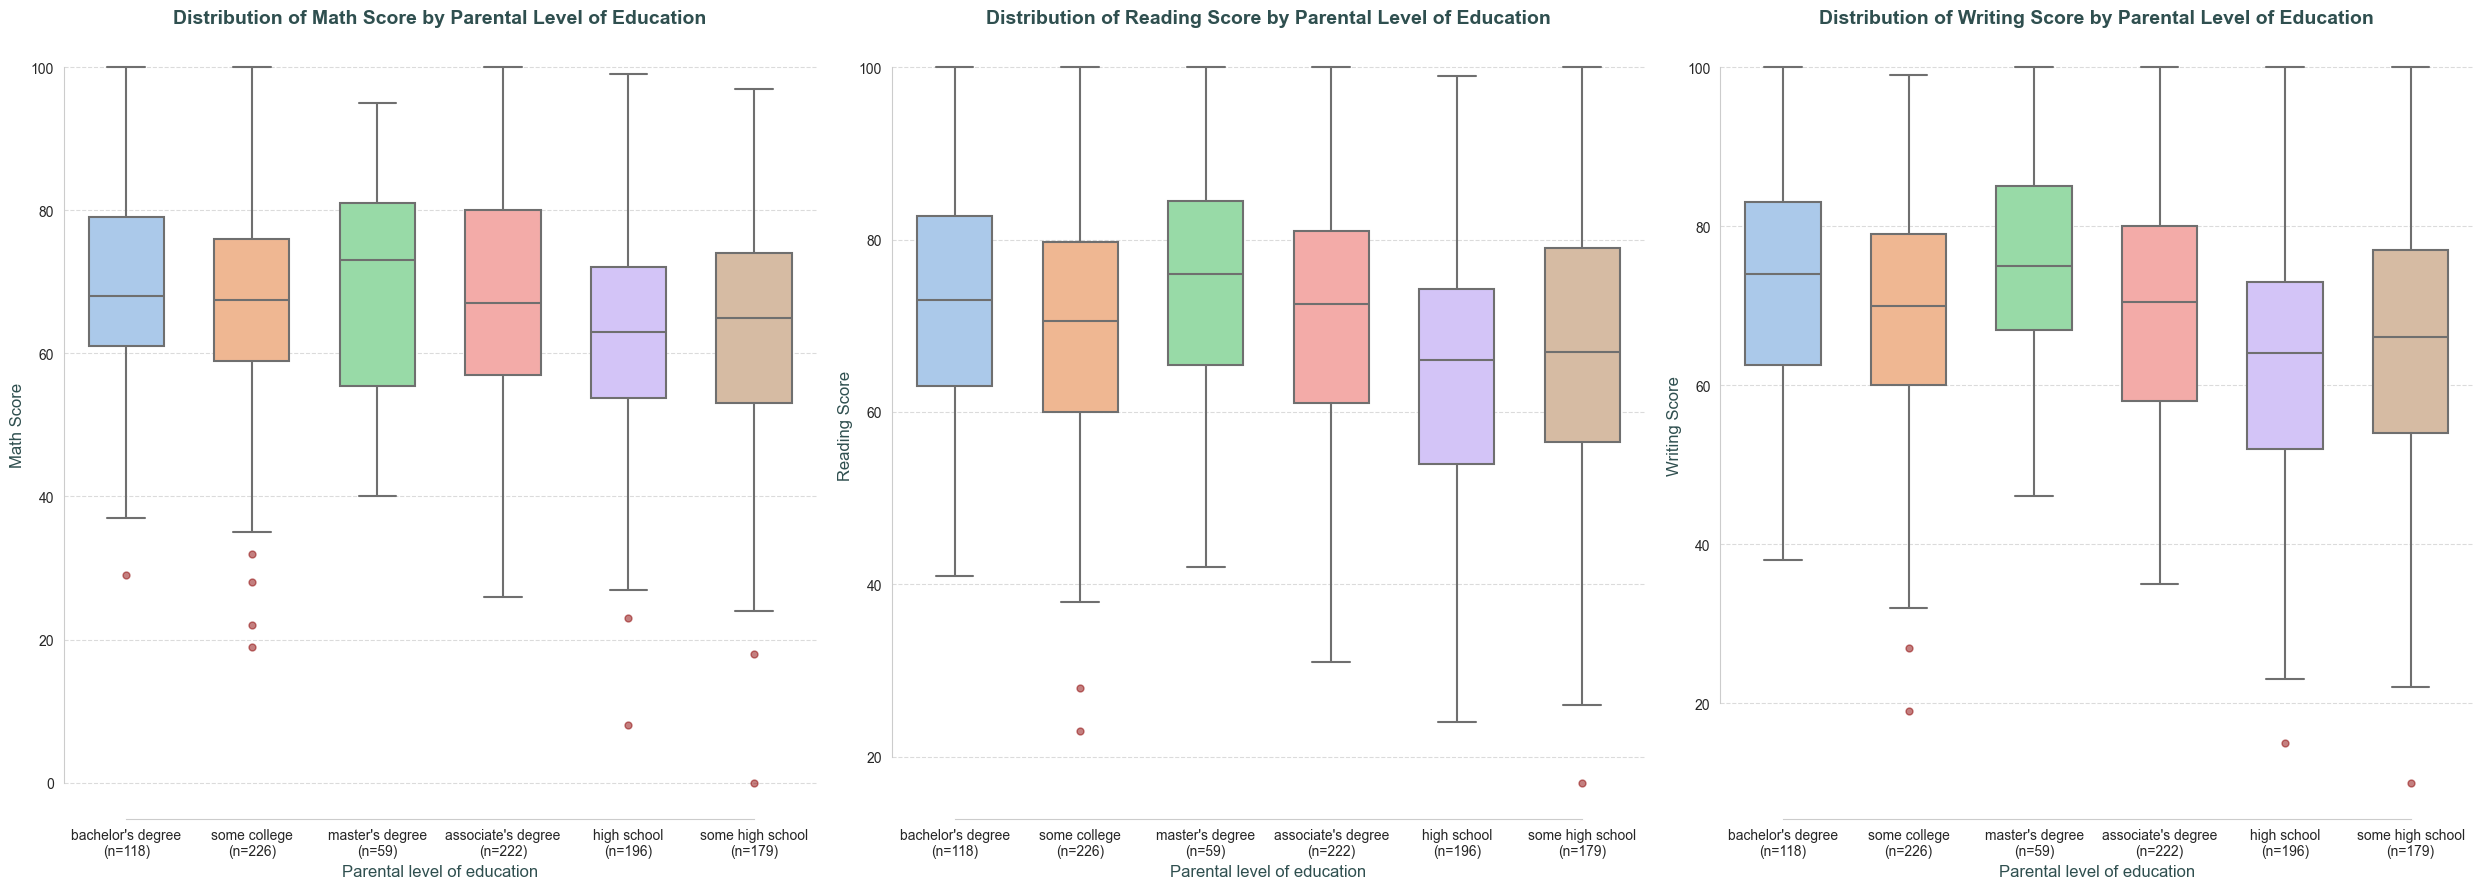

In [37]:
print(f"\n(%) {df['parental level of education'].value_counts(normalize=True) * 100}")


parental_counts = df["parental level of education"].value_counts()
parental_counts_dict = parental_counts.to_dict()
print("\nParental Distribution Counts:\n", parental_counts)

# --- Figure Setup ---
plt.figure(figsize=(25, 9))
sns.set_style("whitegrid")


for i, score_col in enumerate(score_columns):
    ax = plt.subplot(1, 3, i + 1)

    # --- Box Plot Creation ---
    sns.boxplot(
        data=df,
        x="parental level of education",  # Categorical variable for the x-axis
        y=score_col,  # Numerical variable for the y-axis (changes per loop iteration)
        hue="parental level of education",  # Color the boxes based on gender categories
        palette="pastel",  # Choose a color palette for the boxes
        linewidth=1.5,  # Thickness of the box lines
        width=0.6,  # Width of the boxes
        fliersize=5,  # Adjusted fliersize for better visibility of outliers
        flierprops=dict(  # Properties for outlier points
            marker="o",  # Outlier marker shape (circle)
            markerfacecolor="darkred",  # Fill color of outlier markers
            markeredgecolor="darkred",
            alpha=0.5,
        ),
    )

    # --- Update X-axis Ticks to Include Counts ---

    current_x_tick_locations = ax.get_xticks()
    ax.set_xticks(current_x_tick_locations)

    current_x_labels = [label.get_text() for label in ax.get_xticklabels()]
    new_x_labels = []
    for label_text in current_x_labels:
        count = parental_counts_dict.get(label_text, 0)
        new_x_labels.append(f"{label_text}\n(n={count})")
    ax.set_xticklabels(new_x_labels, fontsize=10)

    # --- Plot Customization (Titles, Labels, Ticks) ---
    plt.title(
        f"Distribution of {score_col.replace('_', ' ').title()} by Parental Level of Education",
        fontsize=14,
        fontweight="bold",
        color="darkslategray",
    )
    plt.xlabel("Parental level of education", fontsize=12, color="darkslategray")
    plt.ylabel(score_col.replace("_", " ").title(), fontsize=12, color="darkslategray")
    plt.yticks(fontsize=10)

    # --- Grid and Spines ---
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    sns.despine(trim=True)


# --- Final Layout and Saving ---
plt.tight_layout()
plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/01_students//multi_score_boxplots_parental.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()


###  Score by Parental Education Level

**The box plots illustrate the distribution of student scores across Math, Reading, and Writing, categorized by the highest parental education level**

Key Highlights:

-- Positive Correlation with Parental Education: There's a clear general trend: as parental education level increases, so do the median student scores across all three subjects (Math, Reading, and Writing).

-- Highest Scores: Students whose parents have a Master's Degree or Bachelor's Degree tend to achieve the highest median scores in all subjects.
Lowest Scores: Students whose parents have "some high school" education generally show the lowest median scores.

-- "High School" vs. "Some College": Students with parents who have a "high school" diploma or "some college" education typically fall in the mid-range of scores, performing better than those with "some high school" but generally lower than those with degrees.

-- Variability: While the trend is clear, there is still significant variability within each parental education group, indicated by the spread of the boxes and whiskers, and the presence of outliers.

-- Outliers: Lower outliers (students scoring significantly below the typical range) are present across most education levels, but appear more frequently and at lower score points in groups with lower parental education.

📌 **In summary, the visualizations strongly suggest a positive relationship between a higher parental education level and higher student academic performance in Math, Reading, and Writing.**



(%) lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64

Lunch Counts:
 lunch
standard        645
free/reduced    355
Name: count, dtype: int64


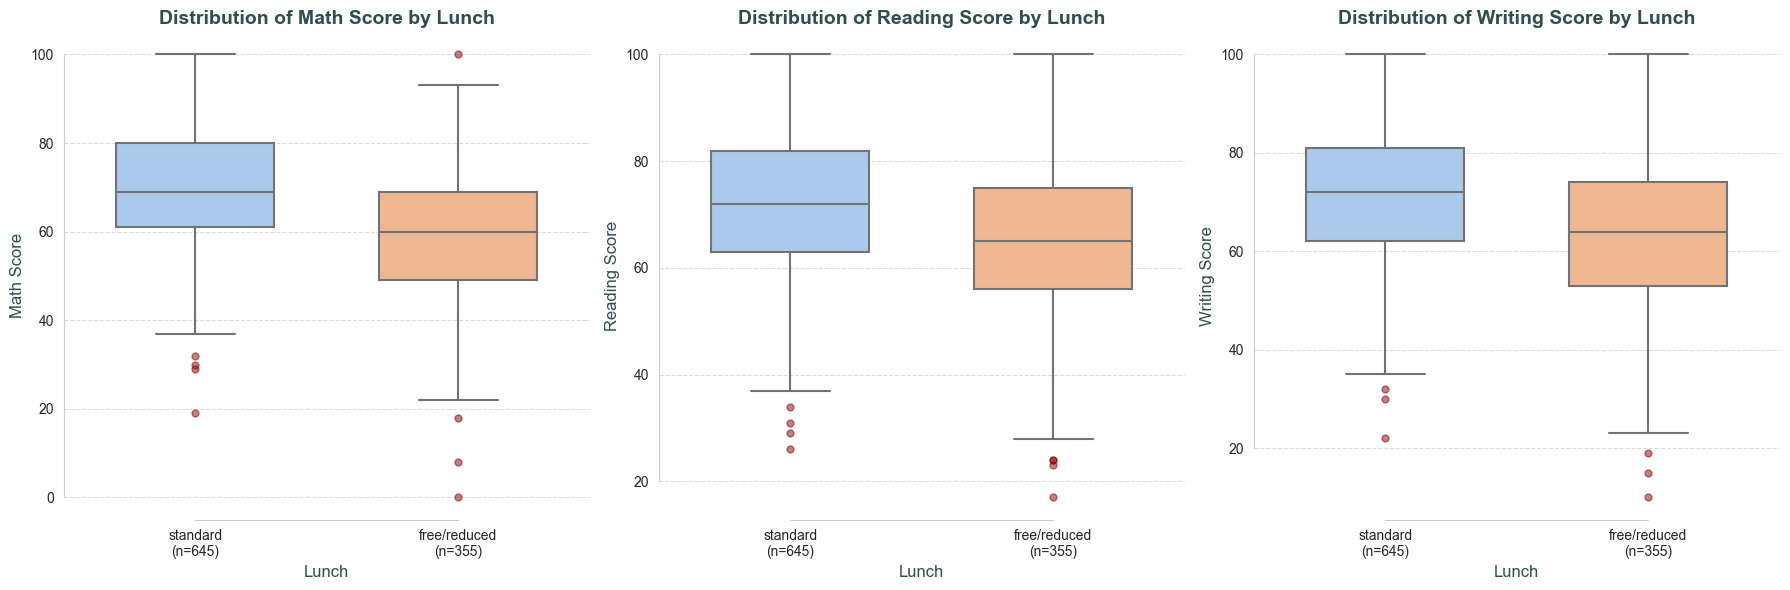

In [38]:
print(f"\n(%) {df['lunch'].value_counts(normalize=True) * 100}")


lunch_counts = df["lunch"].value_counts()
lunch_counts_dict = lunch_counts.to_dict()
print("\nLunch Counts:\n", lunch_counts)

# --- Figure Setup ---
plt.figure(figsize=(18, 6))
sns.set_style("whitegrid")


for i, score_col in enumerate(score_columns):
    ax = plt.subplot(1, 3, i + 1)

    # --- Box Plot Creation ---
    sns.boxplot(
        data=df,
        x="lunch",  # Categorical variable for the x-axis
        y=score_col,  # Numerical variable for the y-axis (changes per loop iteration)
        hue="lunch",  # Color the boxes based on gender categories
        palette="pastel",  # Choose a color palette for the boxes
        linewidth=1.5,  # Thickness of the box lines
        width=0.6,  # Width of the boxes
        fliersize=5,  # Adjusted fliersize for better visibility of outliers
        flierprops=dict(  # Properties for outlier points
            marker="o",  # Outlier marker shape (circle)
            markerfacecolor="darkred",  # Fill color of outlier markers
            markeredgecolor="darkred",
            alpha=0.5,
        ),
    )

    # --- Update X-axis Ticks to Include Counts ---

    current_x_tick_locations = ax.get_xticks()
    ax.set_xticks(current_x_tick_locations)

    current_x_labels = [label.get_text() for label in ax.get_xticklabels()]
    new_x_labels = []
    for label_text in current_x_labels:
        count = lunch_counts_dict.get(label_text, 0)
        new_x_labels.append(f"{label_text}\n(n={count})")
    ax.set_xticklabels(new_x_labels, fontsize=10)

    # --- Plot Customization (Titles, Labels, Ticks) ---
    plt.title(
        f"Distribution of {score_col.replace('_', ' ').title()} by Lunch",
        fontsize=14,
        fontweight="bold",
        color="darkslategray",
    )
    plt.xlabel("Lunch", fontsize=12, color="darkslategray")
    plt.ylabel(score_col.replace("_", " ").title(), fontsize=12, color="darkslategray")
    plt.yticks(fontsize=10)

    # --- Grid and Spines ---
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    sns.despine(trim=True)


# --- Final Layout and Saving ---
plt.tight_layout()
plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/01_students//multi_score_boxplots_lunch.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()


## Score by Lunch Type

This plot compares scores by lunch program participation, used as a proxy for socioeconomic status.

**Standard lunch:** Students consistently score higher in all scores, with higher medians and tighter ranges.

**Free/reduced lunch:** Students tend to have lower scores and wider variability.

📌 **General insight:** Students who don’t rely on subsidized lunches tend to perform better, indicating that socioeconomic status may impact academic achievement.




(%) test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64

Test preparation course Counts:
 test preparation course
none         642
completed    358
Name: count, dtype: int64


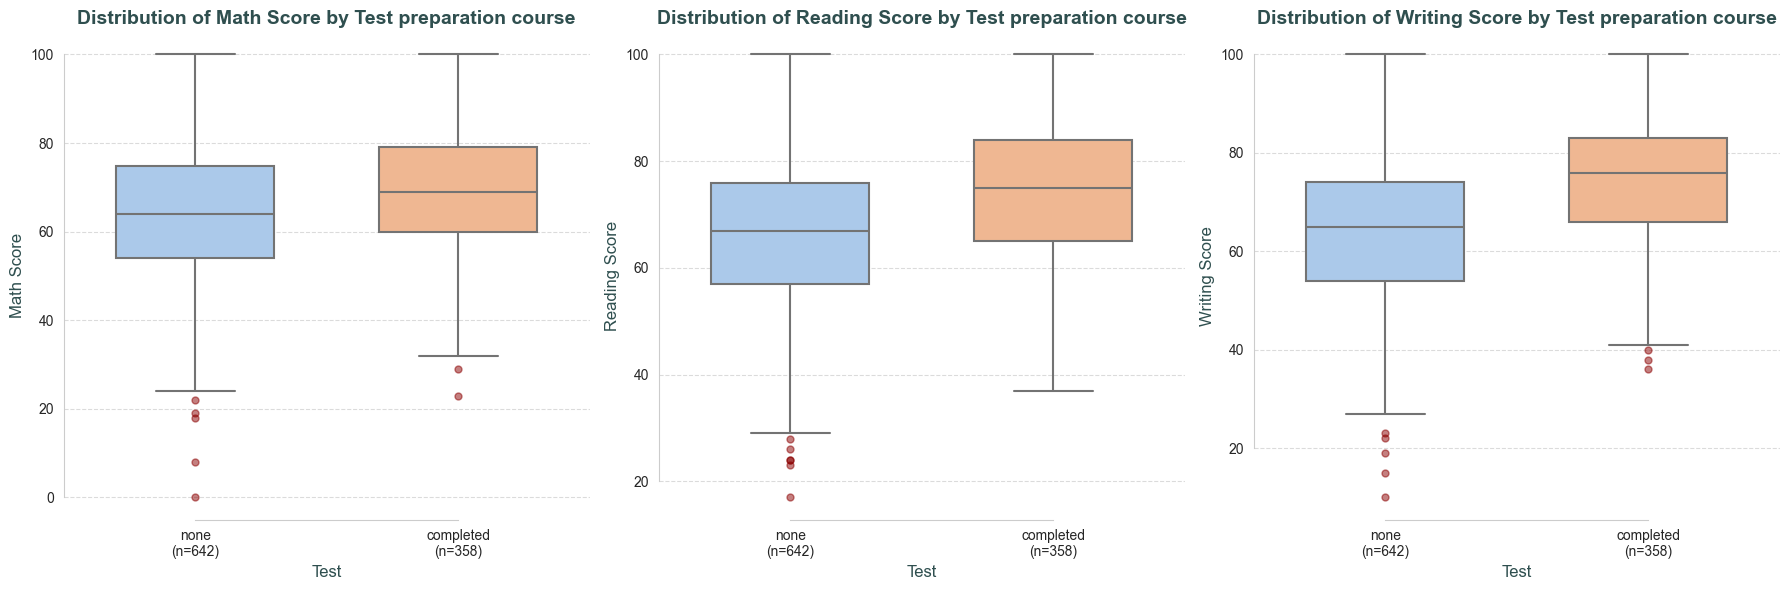

In [39]:
print(f"\n(%) {df['test preparation course'].value_counts(normalize=True) * 100}")

test_preparation_course_counts = df["test preparation course"].value_counts()
test_preparation_course_counts_dict = test_preparation_course_counts.to_dict()
print("\nTest preparation course Counts:\n", test_preparation_course_counts)

# --- Figure Setup ---
plt.figure(figsize=(18, 6))
sns.set_style("whitegrid")


for i, score_col in enumerate(score_columns):
    ax = plt.subplot(1, 3, i + 1)

    # --- Box Plot Creation ---
    sns.boxplot(
        data=df,
        x="test preparation course",  # Categorical variable for the x-axis
        y=score_col,  # Numerical variable for the y-axis (changes per loop iteration)
        hue="test preparation course",  # Color the boxes based on gender categories
        palette="pastel",  # Choose a color palette for the boxes
        linewidth=1.5,  # Thickness of the box lines
        width=0.6,  # Width of the boxes
        fliersize=5,  # Adjusted fliersize for better visibility of outliers
        flierprops=dict(  # Properties for outlier points
            marker="o",  # Outlier marker shape (circle)
            markerfacecolor="darkred",  # Fill color of outlier markers
            markeredgecolor="darkred",
            alpha=0.5,
        ),
    )

    # --- Update X-axis Ticks to Include Counts ---

    current_x_tick_locations = ax.get_xticks()
    ax.set_xticks(current_x_tick_locations)

    current_x_labels = [label.get_text() for label in ax.get_xticklabels()]
    new_x_labels = []
    for label_text in current_x_labels:
        count = test_preparation_course_counts_dict.get(label_text, 0)
        new_x_labels.append(f"{label_text}\n(n={count})")
    ax.set_xticklabels(new_x_labels, fontsize=10)

    # --- Plot Customization (Titles, Labels, Ticks) ---
    plt.title(
        f"Distribution of {score_col.replace('_', ' ').title()} by Test preparation course",
        fontsize=14,
        fontweight="bold",
        color="darkslategray",
    )
    plt.xlabel("Test", fontsize=12, color="darkslategray")
    plt.ylabel(score_col.replace("_", " ").title(), fontsize=12, color="darkslategray")
    plt.yticks(fontsize=10)

    # --- Grid and Spines ---
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    sns.despine(trim=True)


# --- Final Layout and Saving ---
plt.tight_layout()
plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/01_students//multi_score_boxplots_test_preparation_course.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()


###  Score by Test Preparation Course

**The box plots illustrate student scores in Math, Reading, and Writing, separated by whether they completed a test preparation course**

Key Highlights:

-- Significant Improvement: Students who completed the test preparation course consistently show notably higher median scores across all three subjects (Math, Reading, Writing) compared to those who did not.

-- Overall Score Boost: The entire score distribution for the "completed" group is shifted upwards, indicating a general increase in performance.

-- Fewer Low Scores: Completing the course appears to reduce the occurrence of very low scores.

**In essence, the data strongly suggests that test preparation courses lead to better academic performance in these subjects.**

### 📌 Final Insights & Next Steps

**1. Math performance:**  
- Slight underperformance suggests considering math-focused support programs.  
- Actions: Design remedial workshops and peer-tutoring focused on female students.

**2. Reading & Writing consistency:**  
- Stronger performance indicates replicable pedagogical success.  
- Actions: Analyze and model successful teaching strategies for math.

**3. Socioeconomic disparities:**  
- Students in lunch assistance programs exhibit lower writing scores.  
- Actions: Develop intervention initiatives like writing clubs and free tutoring sessions.

**4. Parental education as an impact factor:**  
- Higher parental education correlates with better reading scores.  
- Actions: Launch family-reading campaigns and parent engagement programs.

**Future analysis could include statistical tests (ANOVA, t-tests) to confirm significance and build dashboards for real-time tracking and reporting.**
